In [107]:
import pandas as pd

Читаем метаданные корпуса, подправленные вручную и дополненные автоматически (паттерны, кол-ва токенов итд)

In [108]:
df = pd.read_csv('./corpus-augmented-replicated.csv',sep='\t',index_col=0)

## Метаданные корпуса:

`filename` - строка, полное название текста 

#### Свойства текстов
`date` - строка, дата подписания/написания/обращения 

`authors` - массив, автор документа или выступающий/подписавшийся ("ответственный за документ")

`genres` – массив, все жанровые теги (манифест/выступление/фрагмент)

`names` - массив, заявленное название (иногда больше чем одно напр. ['резолюция всесоюзной конференции', 'рекорды посевов'])

`topics` - массив, темы документа, заявленные в названии или размеченные вручную где возможно. где невозможно выделить одну большую тему - копия столбца names (считаем что документ с самостоятельной маленькой темой из названия)

#### Бинарные категории текстов:
`multiple_authors` - заявлено ли групповое авторство напр. декрет ленина + сталина – да; резолюция съезда - да; послание путина федеральному собранию – нет (считаем что коллективное авторство не заявлено)

`leader_in_author` - заявлено ли что лидер в авторах документа/в подписавшихся/выступает ли. список лидеров ссср [отсюда](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%80%D1%83%D0%BA%D0%BE%D0%B2%D0%BE%D0%B4%D0%B8%D1%82%D0%B5%D0%BB%D0%B5%D0%B9_%D0%A1%D0%A1%D0%A1%D0%A0) - включаем маленкова. TODO подумать считается ли ельцин из 1990 уже руководителем 

`is_written_text` - текст публикуется/доставляется в письменном виде

`addressed_to_people` - непосредственное обращение к широкой аудитории (ко всем гражданам/ко всем рабочим/к казакам). если указано обратное то False. напр. манифест -- [да](https://ru.wikipedia.org/wiki/%D0%92%D1%8B%D1%81%D0%BE%D1%87%D0%B0%D0%B9%D1%88%D0%B8%D0%B9_%D0%BC%D0%B0%D0%BD%D0%B8%D1%84%D0%B5%D1%81%D1%82), послание федеральному собранию - нет

`regular_occasion` -- съезды/конференции/совет/послание фс/инаугурационная речь

`has_major_topic` - заявлена/очевидная единственная тема (см. `topics`)

`is_fragment` -- является ли текст извлечением из оригинального документа/речи

`distorted` - очевидные проблемы в ocr и проч 

#### Аггрегирующие признаки:
`year` - год текста

`period` - исторический период, связанный с правлением лидера страны

`period-denser` - более частые исторические периоды (напр довоенный сталин и послевоенный сталин)

`full_pattern` -- складывается из всех бинарных признаков 

`pattern` -- паттерны в модели где мы принимаем что жанр для наших целей полностью определяется признаками: `multiple_authors`, `leader_in_author`, `is_written_text`, `addressed_to_people` (последнее неочевидно, TODO посмотреть на экспериментах, возможно получится упростить схему удалив addressed_to_people)

#### Остальное
`token_count` - количество токенов (spacy)

`filename_raw` - вспомонательное поле для обхода корпуса



In [109]:
df

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,...,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period,period-denser
0,1894.10.20_николай ii_манифест_о восшествии на...,1894.10.20,['николай ii'],['манифест'],['о восшествии на престол'],['о восшествии на престол'],False,True,True,True,...,False,111,1894,False,False,1110000,478,1894.10.20_николай-ii_манифест_о-восшествии-на...,николай ii,николай ii
1,1896.01.01_николай ii_манифест_коронование,1896.01.01,['николай ii'],['манифест'],['коронование'],['коронование'],False,True,True,True,...,False,111,1896,False,False,1110000,202,1896.01.01_николай-ii_манифест_коронование.txt,николай ii,николай ii
2,1899.02.03_николай ii_манифест_законы княжеств...,1899.02.03,['николай ii'],['манифест'],['законы княжества финляндского'],['законы княжества финляндского'],False,True,True,True,...,False,111,1899,False,False,1110000,455,1899.02.03_николай-ii_манифест_законы-княжеств...,николай ii,николай ii
3,1903.02.26_николай ii_манифест_усовершенствова...,1903.02.26,['николай ii'],['манифест'],['усовершенствование государственной власти'],['усовершенствование государственной власти'],False,True,True,True,...,False,111,1903,False,False,1110000,679,1903.02.26_николай-ii_манифест_усовершенствова...,николай ii,николай ii
4,1904.01.27_николай ii_манифест_об открытии вое...,1904.01.27,['николай ii'],['манифест'],['об открытии военных действий против японии'],['русско японская война 1904'],False,True,True,True,...,True,111,1904,False,False,1110100,399,1904.01.27_николай-ii_манифест_об-открытии-вое...,николай ii,николай ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024.02.29_путин_выступление.послание_послание...,2024.02.29,['путин'],"['выступление', 'послание']",['послание федеральному собранию'],['послание федеральному собранию'],False,True,False,False,...,False,100,2024,False,False,1001000,15982,2024.02.29_путин_выступление.послание_послание...,путин 2012-2024,путин 2018-2024
358,2024.03.14_путин_выступление.обращение к гражд...,2024.03.14,['путин'],"['выступление', 'обращение к гражданам', 'тв']",['обращение к гражданам'],['выборы 2024'],False,True,False,True,...,True,101,2024,False,False,1011100,512,2024.03.14_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
359,2024.03.21_путин_выступление.обращение к гражд...,2024.03.21,['путин'],"['выступление', 'обращение к гражданам', 'тв']",['обращение к гражданам'],"['выборы 2024', 'итоги выборов']",False,True,False,True,...,True,101,2024,False,False,1011100,384,2024.03.21_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
360,2024.03.23_путин_выступление.обращение к гражд...,2024.03.23,['путин'],"['выступление', 'обращение к гражданам', 'тв']",['обращение к гражданам'],['теракт в крокусе'],False,True,False,True,...,True,101,2024,False,False,1010100,667,2024.03.23_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024


#### # поправим типы данных в массивах и булевых полях

In [110]:
import ast


In [111]:
def list_in_string_to_list(list_wrapped_in_string):
    return ast.literal_eval(list_wrapped_in_string)

In [112]:
df['authors'] = df['authors'].apply(list_in_string_to_list)
df['genres'] = df['genres'].apply(list_in_string_to_list)
df['names'] = df['names'].apply(list_in_string_to_list)
df['topics'] = df['topics'].apply(list_in_string_to_list)
df

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,...,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period,period-denser
0,1894.10.20_николай ii_манифест_о восшествии на...,1894.10.20,[николай ii],[манифест],[о восшествии на престол],[о восшествии на престол],False,True,True,True,...,False,111,1894,False,False,1110000,478,1894.10.20_николай-ii_манифест_о-восшествии-на...,николай ii,николай ii
1,1896.01.01_николай ii_манифест_коронование,1896.01.01,[николай ii],[манифест],[коронование],[коронование],False,True,True,True,...,False,111,1896,False,False,1110000,202,1896.01.01_николай-ii_манифест_коронование.txt,николай ii,николай ii
2,1899.02.03_николай ii_манифест_законы княжеств...,1899.02.03,[николай ii],[манифест],[законы княжества финляндского],[законы княжества финляндского],False,True,True,True,...,False,111,1899,False,False,1110000,455,1899.02.03_николай-ii_манифест_законы-княжеств...,николай ii,николай ii
3,1903.02.26_николай ii_манифест_усовершенствова...,1903.02.26,[николай ii],[манифест],[усовершенствование государственной власти],[усовершенствование государственной власти],False,True,True,True,...,False,111,1903,False,False,1110000,679,1903.02.26_николай-ii_манифест_усовершенствова...,николай ii,николай ii
4,1904.01.27_николай ii_манифест_об открытии вое...,1904.01.27,[николай ii],[манифест],[об открытии военных действий против японии],[русско японская война 1904],False,True,True,True,...,True,111,1904,False,False,1110100,399,1904.01.27_николай-ii_манифест_об-открытии-вое...,николай ii,николай ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024.02.29_путин_выступление.послание_послание...,2024.02.29,[путин],"[выступление, послание]",[послание федеральному собранию],[послание федеральному собранию],False,True,False,False,...,False,100,2024,False,False,1001000,15982,2024.02.29_путин_выступление.послание_послание...,путин 2012-2024,путин 2018-2024
358,2024.03.14_путин_выступление.обращение к гражд...,2024.03.14,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],[выборы 2024],False,True,False,True,...,True,101,2024,False,False,1011100,512,2024.03.14_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
359,2024.03.21_путин_выступление.обращение к гражд...,2024.03.21,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],"[выборы 2024, итоги выборов]",False,True,False,True,...,True,101,2024,False,False,1011100,384,2024.03.21_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
360,2024.03.23_путин_выступление.обращение к гражд...,2024.03.23,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],[теракт в крокусе],False,True,False,True,...,True,101,2024,False,False,1010100,667,2024.03.23_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024


In [113]:
type(df['regular_occasion'].iloc[0])

numpy.bool_

In [114]:
def bool_str_to_int_str(bool_val):
    return str(bool_val.astype(int))

## Аудит корпуса

#### 1. по времени

1.1 по годам

In [115]:
# в средним текстов каждый год

df.groupby('year').count()['filename'].mean()

4.469135802469136

In [116]:
# медиана текстов каждый год

df.groupby('year').count()['filename'].median()

3.0

In [117]:
# среднее годовых сумм токенов 

df.groupby('year')['token_count'].sum().mean()


29476.53086419753

In [118]:
# медиана годовых сумм токенов 

df.groupby('year')['token_count'].sum().median()


11633.0

In [119]:
# в эти года больше всего текстов:

df.groupby('year').count()['filename'].sort_values(ascending=False).head(10)

year
1918    58
1917    39
1988    10
2020    10
1922    10
1924     9
1986     9
1923     9
1991     8
1941     7
Name: filename, dtype: int64

In [120]:
# в эти года больше всего токенов:

df.groupby('year')['token_count'].sum().sort_values(ascending=False).head(10)

year
1986    344934
1966    234199
1971    224831
1988    195716
1990    157892
1952     90797
1961     88554
1976     66655
1959     59191
2020     50702
Name: token_count, dtype: int64

#### распределение количества текстов по годам

<Axes: xlabel='year'>

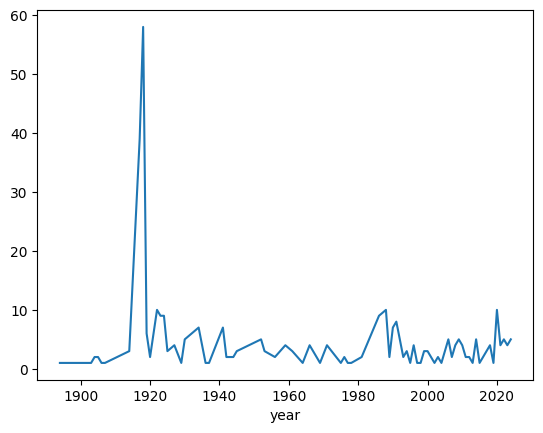

In [121]:
df.groupby('year').count()['filename'].plot.line()

#### распределение суммы токенов по годам

<Axes: xlabel='year'>

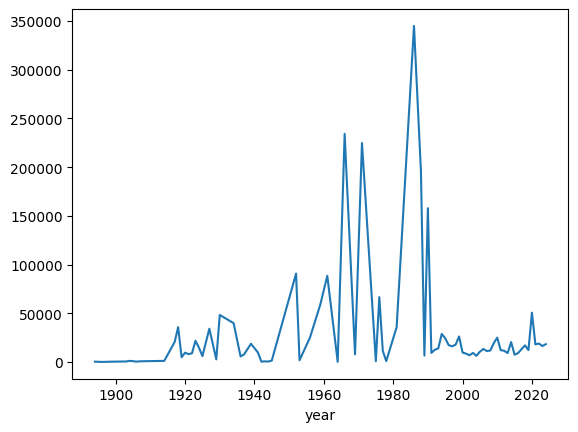

In [122]:
df.groupby('year')['token_count'].sum().plot.line()

1.2 по периодам

In [123]:
# в средним текстов каждый период

df.groupby('period').count()['filename'].mean()

30.166666666666668

In [124]:
# медиана текстов каждый период

df.groupby('period').count()['filename'].median()

18.5

In [125]:
# среднее сумм токенов за период

df.groupby('period')['token_count'].sum().mean()


198966.58333333334

In [126]:
# медиана сумм токенов за период

df.groupby('period')['token_count'].sum().median()


134911.5

In [127]:
# в эти периоды больше всего текстов:

df.groupby('period').count()['filename'].sort_values(ascending=False).head(10)

period
ленин              120
сталин              57
путин 2012-2024     43
горбачев            31
ельцин              25
путин 2000-2008     21
брежнев             16
медведев            14
николай ii          14
хрущев              10
Name: filename, dtype: int64

In [128]:
# в эти периоды больше всего токенов:

df.groupby('period')['token_count'].sum().sort_values(ascending=False).head(10)

period
горбачев           708348
брежнев            583204
сталин             283637
путин 2012-2024    210420
хрущев             173138
ельцин             164289
ленин              105534
путин 2000-2008     78238
медведев            67869
николай ii           6972
Name: token_count, dtype: int64

In [129]:
df.groupby('period')['date'].max().sort_values().index.to_list(
)

['николай ii',
 'временное правительство',
 'ленин',
 'сталин',
 'маленков',
 'хрущев',
 'брежнев',
 'горбачев',
 'ельцин',
 'путин 2000-2008',
 'медведев',
 'путин 2012-2024']

In [130]:
by_period = df.groupby('period').count().reindex(['николай ii',
 'временное правительство',
 'ленин',
 'сталин',
 'маленков',
 'хрущев',
 'брежнев',
 'горбачев',
 'ельцин',
 'путин 2000-2008',
 'медведев',
 'путин 2012-2024'])

In [131]:
by_period

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,regular_occasion,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period-denser
period,,,,,,,,,,,,,,,,,,,,
николай ii,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
временное правительство,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
ленин,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
сталин,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57
маленков,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
хрущев,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
брежнев,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
горбачев,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
ельцин,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25,25


<Axes: xlabel='period'>

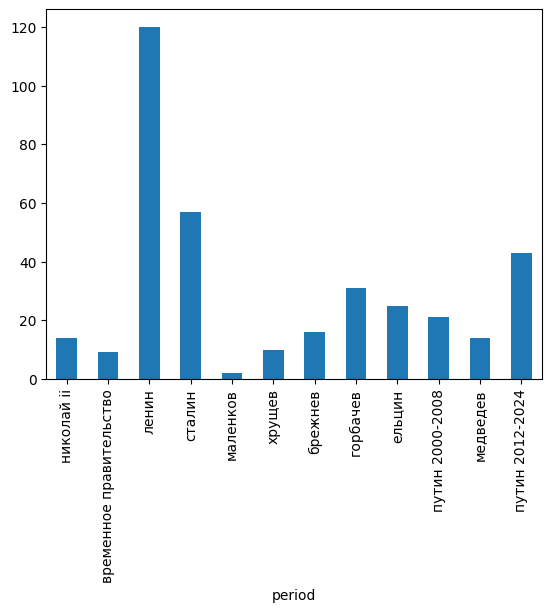

In [132]:
# количества текстов за периоды

by_period['filename'].plot.bar()

In [133]:
by_period_tc = df.groupby('period')['token_count'].sum().reindex(['николай ii',
 'временное правительство',
 'ленин',
 'сталин',
 'маленков',
 'хрущев',
 'брежнев',
 'горбачев',
 'ельцин',
 'путин 2000-2008',
 'медведев',
 'путин 2012-2024'])

by_period_tc

period
николай ii                   6972
временное правительство      4570
ленин                      105534
сталин                     283637
маленков                     1380
хрущев                     173138
брежнев                    583204
горбачев                   708348
ельцин                     164289
путин 2000-2008             78238
медведев                    67869
путин 2012-2024            210420
Name: token_count, dtype: int64

<Axes: xlabel='period'>

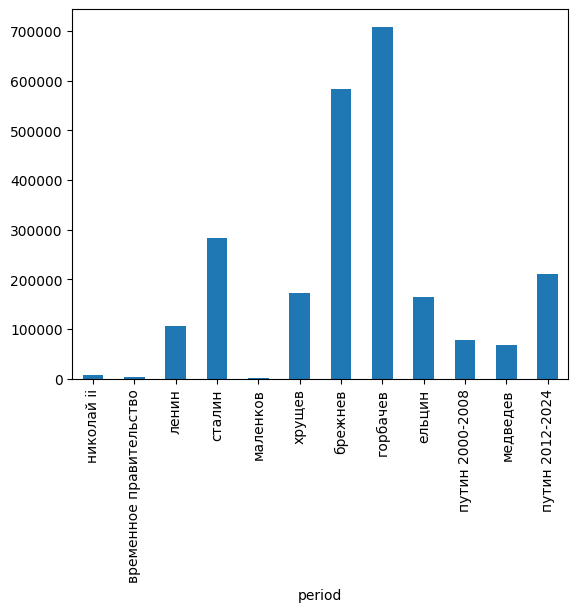

In [134]:
by_period_tc.plot.bar()

1.3 по периодам поточнее

In [135]:
# в средним текстов каждый период

df.groupby('period-denser').count()['filename'].mean()

20.11111111111111

In [136]:
# медиана текстов каждый период

df.groupby('period-denser').count()['filename'].median()

14.0

In [137]:
# среднее сумм токенов за период

df.groupby('period-denser')['token_count'].sum().mean()


132644.38888888888

In [138]:
# медиана сумм токенов за период

df.groupby('period-denser')['token_count'].sum().median()


64348.5

In [139]:
# в эти периоды больше всего текстов:

df.groupby('period-denser').count()['filename'].sort_values(ascending=False).head(10)

period-denser
ленин - революция                       87
сталин - довоенные годы                 35
ленин - поздние годы                    33
горбачев                                31
путин 2018-2024                         29
ельцин 1991-1996                        19
брежнев                                 16
путин 2012-2018                         14
сталин - великая отечественная война    14
николай ii                              14
Name: filename, dtype: int64

In [140]:
# в эти периоды больше всего токенов:

df.groupby('period-denser')['token_count'].sum().sort_values(ascending=False).head(10)

period-denser
горбачев                      708348
брежнев                       583204
сталин - довоенные годы       178968
хрущев                        173138
путин 2018-2024               135208
ельцин 1991-1996              103461
сталин - послевоенные годы     92392
путин 2012-2018                75212
медведев                       67869
ельцин 1996-1999               60828
Name: token_count, dtype: int64

In [141]:
chron_sort = df.groupby('period-denser')['date'].max().sort_values().index.to_list(
)

In [142]:
by_period_denser = df.groupby('period-denser').count().reindex(chron_sort)
by_period_denser

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,regular_occasion,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period
period-denser,,,,,,,,,,,,,,,,,,,,
николай ii,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
временное правительство,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
ленин - революция,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87,87
ленин - поздние годы,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
сталин - довоенные годы,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
сталин - великая отечественная война,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
сталин - послевоенные годы,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
маленков,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
хрущев,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


<Axes: xlabel='period-denser'>

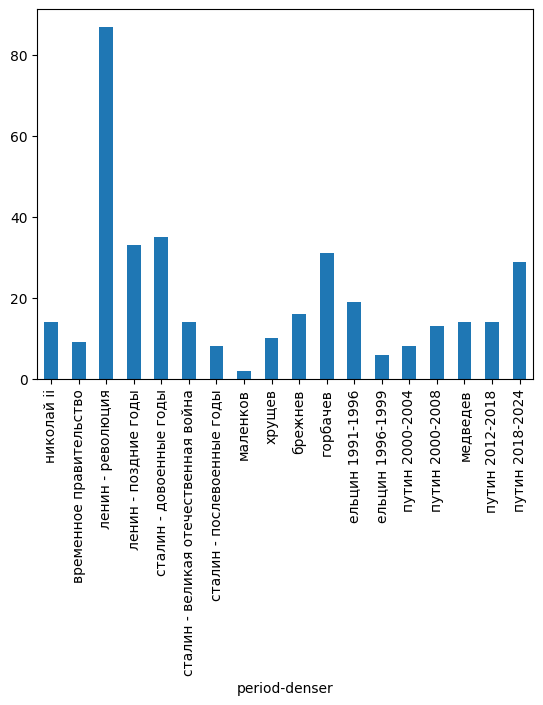

In [143]:
by_period_denser['filename'].plot.bar()

In [144]:
by_period_denser_tc = df.groupby('period-denser')['token_count'].sum().reindex(chron_sort)

by_period_denser_tc

period-denser
николай ii                                6972
временное правительство                   4570
ленин - революция                        51685
ленин - поздние годы                     53849
сталин - довоенные годы                 178968
сталин - великая отечественная война     12277
сталин - послевоенные годы               92392
маленков                                  1380
хрущев                                  173138
брежнев                                 583204
горбачев                                708348
ельцин 1991-1996                        103461
ельцин 1996-1999                         60828
путин 2000-2004                          34964
путин 2000-2008                          43274
медведев                                 67869
путин 2012-2018                          75212
путин 2018-2024                         135208
Name: token_count, dtype: int64

<Axes: xlabel='period-denser'>

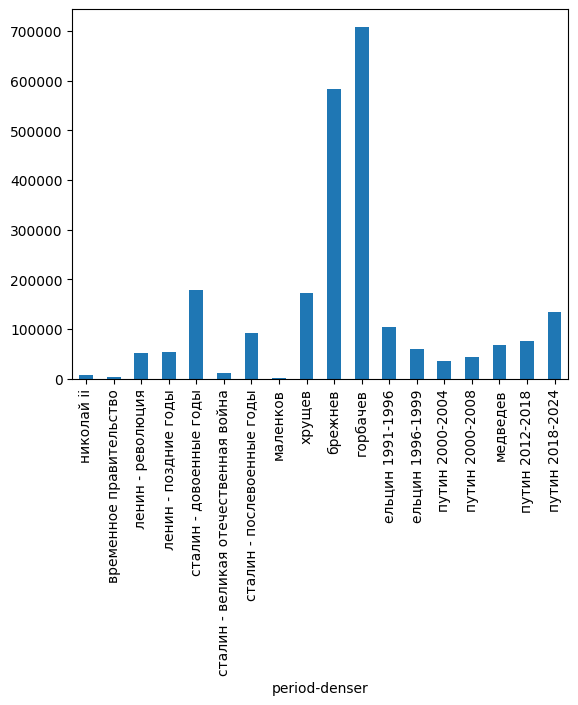

In [145]:
by_period_denser_tc.plot.bar()

In [146]:
df['pattern'] = df['multiple_authors'].astype(int).astype(str) \
+df['leader_in_authors'].astype(int).astype(str)\
+df['is_written_text'].astype(int).astype(str)\
+df['addressed_to_people'].astype(int).astype(str)
# +df['regular_occasion'].astype(int).astype(str)\
# +df['has_major_topic'].astype(int).astype(str)\
# +df['is_fragment'].astype(int).astype(str)\
# +df['distorted'].astype(int).astype(str)
df

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,...,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period,period-denser
0,1894.10.20_николай ii_манифест_о восшествии на...,1894.10.20,[николай ii],[манифест],[о восшествии на престол],[о восшествии на престол],False,True,True,True,...,False,0111,1894,False,False,1110000,478,1894.10.20_николай-ii_манифест_о-восшествии-на...,николай ii,николай ii
1,1896.01.01_николай ii_манифест_коронование,1896.01.01,[николай ii],[манифест],[коронование],[коронование],False,True,True,True,...,False,0111,1896,False,False,1110000,202,1896.01.01_николай-ii_манифест_коронование.txt,николай ii,николай ii
2,1899.02.03_николай ii_манифест_законы княжеств...,1899.02.03,[николай ii],[манифест],[законы княжества финляндского],[законы княжества финляндского],False,True,True,True,...,False,0111,1899,False,False,1110000,455,1899.02.03_николай-ii_манифест_законы-княжеств...,николай ii,николай ii
3,1903.02.26_николай ii_манифест_усовершенствова...,1903.02.26,[николай ii],[манифест],[усовершенствование государственной власти],[усовершенствование государственной власти],False,True,True,True,...,False,0111,1903,False,False,1110000,679,1903.02.26_николай-ii_манифест_усовершенствова...,николай ii,николай ii
4,1904.01.27_николай ii_манифест_об открытии вое...,1904.01.27,[николай ii],[манифест],[об открытии военных действий против японии],[русско японская война 1904],False,True,True,True,...,True,0111,1904,False,False,1110100,399,1904.01.27_николай-ii_манифест_об-открытии-вое...,николай ii,николай ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024.02.29_путин_выступление.послание_послание...,2024.02.29,[путин],"[выступление, послание]",[послание федеральному собранию],[послание федеральному собранию],False,True,False,False,...,False,0100,2024,False,False,1001000,15982,2024.02.29_путин_выступление.послание_послание...,путин 2012-2024,путин 2018-2024
358,2024.03.14_путин_выступление.обращение к гражд...,2024.03.14,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],[выборы 2024],False,True,False,True,...,True,0101,2024,False,False,1011100,512,2024.03.14_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
359,2024.03.21_путин_выступление.обращение к гражд...,2024.03.21,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],"[выборы 2024, итоги выборов]",False,True,False,True,...,True,0101,2024,False,False,1011100,384,2024.03.21_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
360,2024.03.23_путин_выступление.обращение к гражд...,2024.03.23,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],[теракт в крокусе],False,True,False,True,...,True,0101,2024,False,False,1010100,667,2024.03.23_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024


In [147]:
df['full_pattern'] = df['multiple_authors'].astype(int).astype(str) \
+df['leader_in_authors'].astype(int).astype(str)\
+df['is_written_text'].astype(int).astype(str)\
+df['addressed_to_people'].astype(int).astype(str)\
+df['regular_occasion'].astype(int).astype(str)\
+df['has_major_topic'].astype(int).astype(str)\
+df['is_fragment'].astype(int).astype(str)\
+df['distorted'].astype(int).astype(str)
df

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,...,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period,period-denser
0,1894.10.20_николай ii_манифест_о восшествии на...,1894.10.20,[николай ii],[манифест],[о восшествии на престол],[о восшествии на престол],False,True,True,True,...,False,0111,1894,False,False,01110000,478,1894.10.20_николай-ii_манифест_о-восшествии-на...,николай ii,николай ii
1,1896.01.01_николай ii_манифест_коронование,1896.01.01,[николай ii],[манифест],[коронование],[коронование],False,True,True,True,...,False,0111,1896,False,False,01110000,202,1896.01.01_николай-ii_манифест_коронование.txt,николай ii,николай ii
2,1899.02.03_николай ii_манифест_законы княжеств...,1899.02.03,[николай ii],[манифест],[законы княжества финляндского],[законы княжества финляндского],False,True,True,True,...,False,0111,1899,False,False,01110000,455,1899.02.03_николай-ii_манифест_законы-княжеств...,николай ii,николай ii
3,1903.02.26_николай ii_манифест_усовершенствова...,1903.02.26,[николай ii],[манифест],[усовершенствование государственной власти],[усовершенствование государственной власти],False,True,True,True,...,False,0111,1903,False,False,01110000,679,1903.02.26_николай-ii_манифест_усовершенствова...,николай ii,николай ii
4,1904.01.27_николай ii_манифест_об открытии вое...,1904.01.27,[николай ii],[манифест],[об открытии военных действий против японии],[русско японская война 1904],False,True,True,True,...,True,0111,1904,False,False,01110100,399,1904.01.27_николай-ii_манифест_об-открытии-вое...,николай ii,николай ii
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2024.02.29_путин_выступление.послание_послание...,2024.02.29,[путин],"[выступление, послание]",[послание федеральному собранию],[послание федеральному собранию],False,True,False,False,...,False,0100,2024,False,False,01001000,15982,2024.02.29_путин_выступление.послание_послание...,путин 2012-2024,путин 2018-2024
358,2024.03.14_путин_выступление.обращение к гражд...,2024.03.14,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],[выборы 2024],False,True,False,True,...,True,0101,2024,False,False,01011100,512,2024.03.14_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
359,2024.03.21_путин_выступление.обращение к гражд...,2024.03.21,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],"[выборы 2024, итоги выборов]",False,True,False,True,...,True,0101,2024,False,False,01011100,384,2024.03.21_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024
360,2024.03.23_путин_выступление.обращение к гражд...,2024.03.23,[путин],"[выступление, обращение к гражданам, тв]",[обращение к гражданам],[теракт в крокусе],False,True,False,True,...,True,0101,2024,False,False,01010100,667,2024.03.23_путин_выступление.обращение-к-гражд...,путин 2012-2024,путин 2018-2024


2. по жанрам/паттернам



In [148]:
# самые популярные жанры по количеству текстов

df.groupby(by=['pattern']).count().sort_values(by=['filename'], ascending=False)['filename']

pattern
1010    102
0100     85
0111     48
0101     33
1110     29
1011     19
0110     17
1000     12
1111      7
0000      6
0010      3
1001      1
Name: filename, dtype: int64

самые популярные жанры:

1010 письменные документы коллективного авторства без лидера направленные политикам (резолюция съезда, декрет снк)

0100 устные сольные выступления лидера адресованные политикам (доклад цк, послание фед собранию)

0111 письменные сольные тексты лидера широкой аудитории (статьи, заявления)

0101 устные сольные обращения лидера к гражданам (выступления по тв)

1110 коллективные письменные письма политиков вместе с лидеро политикам (декреты снк)

0110 письменные сольные обращения лидера политикам (статья ленина, письма)

1011 коллективные письменные тексты без лидера широкой аудитории (воззвание, конституция)

1000 коллективные устные обсуждения политиков без лидера (прения на съезде)

1111 коллективные письменные тексты с лидерам широкой аудитории (воззвания от ленина+снк)

0000 устные сольные выступления не-лидера

1001 письменный сольный документ не-лидера к народу


выводы/предположения:



считаем что коллективное авторство с лидером и без эквивалентны? 1.=5.?

считаем что устные выступления лидера и не-лидеры равны? 2. 4. 9.

письменная статья лидера туда же? программные статьи а также мысли/записки



1,5

2,4,9


3,6,7,8,10

новая идея: может не разделять друг от друга а просто смотреть в разрезах:

1. все тексты от лидера
2. устные выступления лидера и не-лидеров
3. все обращения напрямую к гражданам

итд? на подумать на ближайшее время

In [149]:
df[df['pattern']=='1001']

,filename,date,authors,genres,names,topics,multiple_authors,leader_in_authors,is_written_text,addressed_to_people,...,has_major_topic,pattern,year,is_fragment,distorted,full_pattern,token_count,filename_raw,period,period-denser
114,1919.03.20_съезд ркпб 8_приветствие_приветстви...,1919.03.20,[съезд ркпб 8],[приветствие],[приветствие красной армии],[приветствие красной армии],True,False,False,True,...,False,1001,1919,False,False,10010000,104,1919.03.20_съезд-ркпб-8_приветствие_приветстви...,ленин,ленин - поздние годы


распределение текстов по годам и по паттернам

<Axes: xlabel='year'>

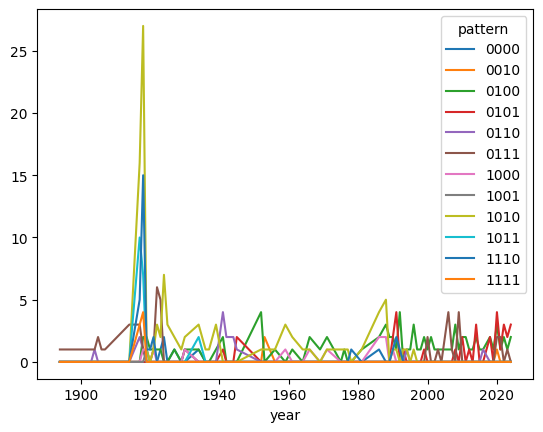

In [150]:
df.groupby(by=['year','pattern']).count()

grouped_by_year_by_pattern = df.groupby(by=['year','pattern']).count()
grouped_by_year_by_pattern.pivot_table(values="filename",index="year",columns="pattern").fillna(0).plot()

In [151]:
top_5_patterns = df.groupby(by=['pattern']).count().sort_values(by=['filename'], ascending=False)['filename'].index.to_list()[:5]
top_5_patterns

['1010', '0100', '0111', '0101', '1110']

<Axes: xlabel='year'>

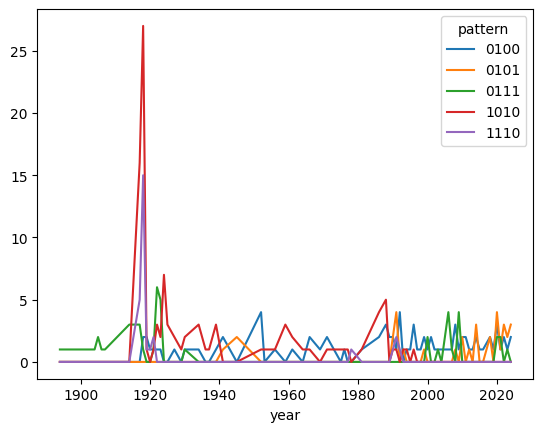

In [152]:
count_by_top_5_patters_by_year = df[
    df['pattern'].isin(top_5_patterns)
].groupby(by=['year','pattern']).count()

grouped_by_year_by_pattern = count_by_top_5_patters_by_year
grouped_by_year_by_pattern.pivot_table(values="filename",index="year",columns="pattern").fillna(0).plot()

распределение по годам для топ-5 паттернов

2.1 по паттернам по токенам

In [153]:
# самые популярные жанры по количеству текстов

df.groupby(by=['pattern'])['token_count'].sum().sort_values(ascending=False)

pattern
0100    959135
1000    899290
1010    323839
0111     67691
0101     59459
0000     23121
1110     20467
0010     13076
1011     10565
0110      5575
1111      5277
1001       104
Name: token_count, dtype: int64

больше всего токенов в жанрах:

1000 коллективные устные обсуждения политиков без лидера (прения на съезде)

0100 устные сольные выступления лидера адресованные политикам (доклад цк, послание фед собранию)

1010 письменные документы коллективного авторства без лидера направленные политикам (резолюция съезда, декрет снк)

0101 устные сольные обращения лидера к гражданам (выступления по тв)

0111 письменные сольные тексты лидера широкой аудитории (статьи, заявления)

0110 письменные сольные обращения лидера политикам (статья ленина, письма)

1110 коллективные письменные письма политиков вместе с лидеро политикам (декреты снк)

0000 устные сольные выступления не-лидера

1011 коллективные письменные тексты без лидера широкой аудитории (воззвание, конституция)

1111 коллективные письменные тексты с лидерам широкой аудитории (воззвания от ленина+снк)

0010 письменный сольный документ не-лидера

хочется посмотреть отдельно:

посмотреть отдельно 0100 -- послание лидера политикам 

----
безопасное соединение:


1000 + 0100 + 0000 устное выступление политика перед политиками

1111 + 1011 коллективный письменный текст для широкой аудитории

0110 + 0010 сольный письменный текст политика перед политиками

----
варианты соединений:

1. один политик другим политикам:
1000 + 0100 + 0000 + 0110 + 0010 

2. один политик широкой аудитории (устное и письменное)
0101 + 0111

3. коллектив для широкой аудитории (всегда письменное, с и без лидера)
1011 + 1111

4*. для широкой аудитории:
0101 + 0111 + 1011 + 1111

5. коллектив политиков политикам
1010 + 0100





In [154]:
df.groupby(by=['pattern'])['token_count'].sum().sort_values(ascending=False)

pattern
0100    959135
1000    899290
1010    323839
0111     67691
0101     59459
0000     23121
1110     20467
0010     13076
1011     10565
0110      5575
1111      5277
1001       104
Name: token_count, dtype: int64

In [155]:
top_5_patterns = df.groupby(by=['pattern'])['token_count'].sum().sort_values(ascending=False).index.to_list()[:5]
top_5_patterns

['0100', '1000', '1010', '0111', '0101']

<Axes: xlabel='year'>

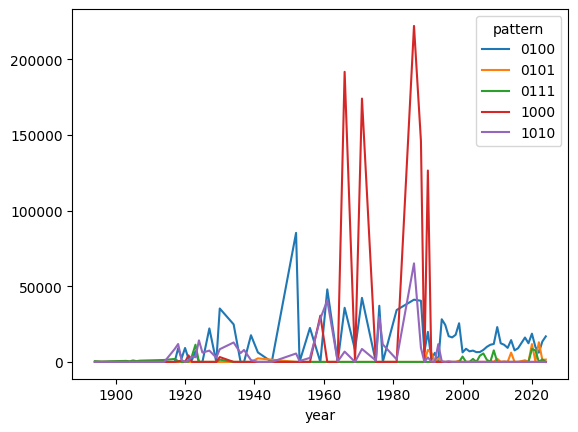

In [156]:
count_by_top_5_patters_by_year = pd.DataFrame(df[
    df['pattern'].isin(top_5_patterns)
].groupby(by=['year','pattern'])['token_count'].sum())

grouped_by_year_by_pattern = count_by_top_5_patters_by_year
grouped_by_year_by_pattern.pivot_table(values="token_count",index="year",columns="pattern").fillna(0).plot()

In [157]:
df.groupby(by=['pattern']).count().sort_values(by=['filename'], ascending=False)['filename'].index.to_list()[:5]

['1010', '0100', '0111', '0101', '1110']

In [158]:
df.groupby(by=['pattern'])['token_count'].sum().sort_values(ascending=False).index.to_list()[:5]

['0100', '1000', '1010', '0111', '0101']

пересекающиеся жанры:

0100 устное обращение лидера к политикам (на съезде итд)

1010 письменный безлидерный коллективный внутриполитический текст (в тч декрет, постановление итд)

0101 устное обращение лидера к гражданам

0111 письменное обращение лидера к гражданам

подумать: может получится сплющить еще
подумать: нормализация?